# Übung 1

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.
   
   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

## 1.1 Zentrale Lernprobleme im Machine Learning


In dieser **kurzen Übung** möchte ich Ihren Blick für die verschiedenen Lernproblemtypen im Machine Learning schärfen. Wenn Sie mit Daten zu tun haben, dann werden Sie oft Ideen generieren wollen, was Sie mit den Daten eigentlich machen können. Ihre Daten bestimmen, welche Methoden und welche Lernproblemtypen im Machine Learning anwendbar sind.

* Betrachten Sie kurz noch einmal die folgende Folie aus der Vorlesung. 
* Als kurze Erinnerung zur Vorlesung: Unsupervised Learning wird typischerweise für Aufgaben wie Clustering (= Einteilen von Objekten in verschiedene Gruppen) oder Dimensionsreduktion eingesetzt.
* Bearbeiten Sie dann die unter der Folie stehenden Fragen.

<img src="https://data.bialonski.de/ml/exercise-1.png" style="border:1px solid black">

Sie finden unten eine Liste von Aufgaben und Daten.

* Im Falle von Aufgaben: In welche der drei auf der Folie genannten Lernproblemklassen (Supervised, Unsupervised, Reinforcement Learning) fallen diese Aufgaben? Bei Ihren Überlegungen kann es hilfreich sein, sich vorzustellen, welche Daten bei den Aufgaben vorliegen könnten. 

* Im Falle von Daten: In welche Lernproblemklasse könnten diese Daten fallen?

Mehrfachantworten können möglich sein. Begründen Sie ganz kurz Ihre Antwort (nur Stichworte; investieren Sie nicht zu viel Zeit). 

###### 1. Automatische Buchempfehlung für Kunden eines Onlinebuchhändlers.

###### 2. Vorhersage des Kreditlimits von Bankkunden.

###### 3. Spielen des Strategiespiels Tic-Tac-Toe.

###### 4. Eine Datenbank mit Songs (Audiodaten).

###### 5. Eine Datenbank mit Songs (Audiodaten) sowie Songtitel und Künstler.

## 1.2. Perzeptron-Lern-Algorithmus (PLA)

Das Perzeptron haben Sie in der Vorlesung kurz kennengelernt, als wir darüber diskutierten, wie eine Bank entscheiden könnte, ob sie Kunden Kredit gewährt oder nicht. Ein Perzeptron lässt sich als ganz einfaches Neuron interpretieren, mit dem wir Supervised Learning für Klassifikationsprobleme einsetzen können. In dieser Übung werden Sie das Perzeptron sowie den Perzeptron-Lern-Algorithmus (PLA) implementieren, mithilfe dessen Hilfe ein Perzeptron auf Daten für Klassifikationsprobleme trainiert werden kann.

PLA lässt sich recht einfach implementieren und erlaubt Ihnen, erste Erfahrungen mit Supervised Machine Learning zu sammeln, ohne dass die Komplexität von Lernalgorithmen in Bibliotheken vor Ihnen versteckt wird.  

* Wenn Sie wünschen, können Sie sich das PDF der Vorlesung in ILIAS herunterladen und noch einmal kurz die Folien nachschlagen, die das Perzeptron behandeln.

Wir gehen in zwei Schritten vor:

1. Wir implementieren das Perzeptron als Funktion.
2. Wir implementieren den Perzeptron-Lern-Algorithmus (PLA).

### 1.2.1 Perzeptron
Sehen Sie sich noch einmal Folie 1-32ff an. Das Perzeptron $h(\mathbf{x})$ ist definiert wie folgt:

$$h(\mathbf{x}) = \text{sign}(\mathbf{w}^T\mathbf{x})$$

mit Gewichten $w_i$ sowie mit der Vorzeichenfunktion $\text{sign}(s)$, die das Vorzeichen (+1 oder -1) ihres Arguments ausgibt. Wir werden das Perzeptron in zwei Dimensionen ($d=2$) betrachten. Die Vektoren $\mathbf{w}$ und $\mathbf{x}$ habe ich Ihnen für diesen Fall noch einmal notiert:

$$\mathbf{w}\in\{(w_0, w_1, w_2)^T | w_0 \in\mathbb{R}, w_1 \in\mathbb{R}, w_2 \in\mathbb{R} \}$$

und

$$\mathbf{x}\in\{(x_0, x_1, x_2)^T | x_0 = 1, x_1 \in\mathbb{R}, x_2 \in\mathbb{R} \}$$

wobei $w_0$ die Rolle des Schwellwerts $b$ spielt. Wir hatten das Perzeptron im Kontext des Problems der Kreditgewährung kennengelernt, wo $\mathbf{x}$ die Features (Eigenschaften) des Bankkunden sind, $w_i$ die Gewichtung dieser Eigenschaften und $h(\mathbf{x})$ die finale Entscheidung über die Kreditvergabe. Die Aufgabe von PLA wird es sein, die Gewichte $w_i$ und den Schwellwert $b$ so zu verändern (bzw. zu "lernen"), dass die Entscheidungen ($h(\mathbf{x})$) über den Kredit mit denen übereinstimmen, die die Bankangestellten getroffen haben (um einmal im "Kreditvergabe"-Beispiel zu bleiben).

**Ihre Aufgaben:**

* Implementieren Sie das Perzeptron als Funktion mit dem Namen `h`, die einen Featurevektor $x$ und einen Gewichtsvektor $w$ entgegennimmt und $h(\mathbf{x})$ zurückgibt. Nutzen Sie die numpy Funktionen `dot` ([Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)) und `sign` ([Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html)).

In [76]:
import numpy as np

# Implementieren Sie hier das Perzeptron
def h(x, w):
    return np.sign(x @ w)

### 1.2.2 PLA Algorithmus

* **Bevor Sie fortfahren,** hier noch ein Hinweis: Sollten Sie einmal aus Versehen eine Endlosschleife bauen und/oder Ihr Algorithmus terminiert nicht, dann wird das Schließen des Browserfensters den Rechenprozess (den Kernel) nicht stoppen. Er wird auf dem Server weiterlaufen. Stattdessen sollten Sie in diesem Fall den Kernel dieses *Jupyter Notebooks* stoppen durch das Menü `Kernel -> Interrupt` oder durch die Tastatur mit: `ESC` (Wechsel in den Command-Mode) und dann zweimal die Taste `i` drücken. Wenn Sie sich für weitere Informationen zu *Jupyter Notebook* interessieren, schauen Sie auch gerne in das Tutorial der Übung 1.1. 
* Vergessen Sie nicht, Ihr *Jupyter Notebook* ab und an zu speichern (mit der Tastenkombination `Strg` + `s`).

Lesen Sie sich zunächst den Algorithmus durch.

#### Der PLA Algorithmus

* **Daten:** $(\mathbf{x_i}, y_i)$ mit $i=1,\ldots,N$. 
* **Annahme:** Die Daten sind linear separierbar, d.h. wir können die Daten mithilfe einer Geraden ($d=2$) oder Hyperebene ($d>2$) in ihre Klassen aufteilen.

Sei $t=0,1,2,\ldots$ der aktuelle Iterationsschritt und sei $\mathbf{w}(t)$ der Vektor $\mathbf{w}$ zum Iterationsschritt $t$. Setze $t=0$ und $\mathbf{w}(0)=\mathbf{0}$.

1. Nutze das Perzeptron mit $\mathbf{w}(t)$ und klassifiziere alle Daten $\mathbf{x_i}, i=1,\ldots,N$.
2. Selektiere irgendein Paar $(\mathbf{x}_j, y_j)$, das falsch klassifiziert wurde, und nenne es $(\mathbf{x}(t), y(t))$. Wenn es kein solches Paar gibt, terminiere.
3. Aktualisiere das Gewicht $\mathbf{w}$ mit folgender Regel: $$\mathbf{w}(t+1) = \mathbf{w}(t)+y(t)\mathbf{x}(t)$$
4. Erhöhe $t$ um den Wert $1$ und kehre zu Schritt 1 zurück.

**Ihre Aufgaben**

(1) Lesen Sie sich den Algorithmus durch. In welchem Fall terminiert der Algorithmus? *In welchem Fall terminiert der Algorithmus nicht?*

(2) In der unteren Code-Zelle finden Sie einen synthetischen Datensatz, an den wir ein Perzeptron mithilfe von PLA trainieren wollen. Führen Sie den unten stehenden Code aus und betrachten die dadurch entstehende Abbildung. Die Funktionen im Bereich "Helper Functions" sind für Sie nicht weiter relevant. Sie dienen nur der Erzeugung des Datensatzes.

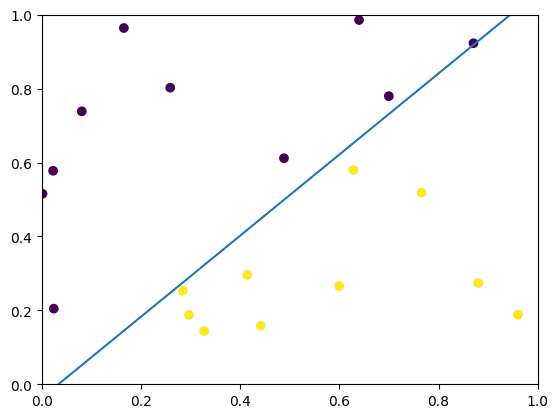

In [77]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt


# --------- START - Helper functions which are not important for you ---------

def generate_points(N):
    return np.random.rand(N, 2)


def generate_decision_line():
    g = generate_points(2)
    m = (g[1, 1] - g[1, 0]) / (g[0, 1] - g[0, 0])
    b = g[1, 0] - m * g[0, 0]

    def getY(x):
        return m * x + b

    func = getY
    return func


# This function creates an "unknown" target function f.
# f is then used to create labels y for points X.
# X is a matrix containing N rows (the data points) of
# with 2 dimensions (columns) each.
def getClassedPoints(N):
    np.random.seed(5)
    f = generate_decision_line()
    X = generate_points(N)
    y = np.array([1 if f(X[i, 0]) > X[i, 1] else -1
                  for i in range(X.shape[0])])
    return X, y, f


# --------- END - Helper functions which are not important for you ---------

# Obtain points X, labels y, and target function f.
# Note that in real world problems, we do not know f.
X, y, f = getClassedPoints(20)

# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y)  # plots the data points
plt.plot(np.array([0, 1]), f(np.array([0, 1])))  # plots the target function
plt.axis((0, 1, 0, 1))  # ensures that we see the relevant part of the feature space
plt.show()

(3) Untersuchen Sie die Daten und beantworten Sie folgende Fragen: Wie viele Datenpunkte enthält der Datensatz? Wie viele Features besitzt jeder Datenpunkt?

In [78]:
X.shape

(20, 2)

(4) Nehmen Sie sich die Folien der heutigen Vorlesung zur Hand. Klären Sie für sich die Frage: Wie viele Einträge besitzt der Gewichtsvektor?

(5) Implementieren Sie nun den Perzeptron-Lernalgorithmus (PLA) als Funktion mit dem Namen `pla`, die die Feature-Datenmatrix X (Nx2 Matrix), den Labelvektor $\mathbf{y}$ sowie Gewichte $\mathbf{w}(t)$ entgegennimmt und die finalen Gewichte $\mathbf{w}_\text{final}$ zurückgibt.

*Hinweise:*
* Die Funktion "pla" sollte sich selber rekursiv aufrufen, sofern ein Datenpunkt gefunden wurde, der durch das Perzeptron mit den aktuellen Gewichten $\mathbf{w}(t)$ nicht korrekt klassifiziert wird.
* Der Schwellwert ist im Gewichtsvektor $\mathbf{w}$ als 0-te Komponente enthalten ($w_0$). Der korrespondierende Datenwert $x_0$ ist aber in den Featurevektoren nicht enthalten. Schreiben Sie Ihre Funktion "pla" so, dass sie dort jeden untersuchten Featurevektor um die 0-te Komponente erweitern, bevor Sie ihn Ihrer Funktion "h" übergeben. Sie können [`np.column_stack`](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html#numpy.column_stack) dafür verwenden.

In [79]:
def pla(X, y, w=None, t=0):
    if t == 0:
        X = np.column_stack((np.ones(X.shape[0]), X))
    if w is None:
        w = np.zeros(X.shape[1])

    for i, x in enumerate(X):
        if h(x, w) != y[i]:
            return pla(X, y, w + y[i]*x, t+1)

    return w

(6) Implementieren Sie eine Funktion `p`, die Ihnen die Entscheidungsgerade berechnet, die durch die von Ihrem Perzeptron gelernten Gewichte definiert wird. Die Funktion `p` nimmt einen beliebigen Wert $x$ sowie den finalen Gewichtsvektor $\mathbf{w}_\text{final}$ entgegen und gibt die Funktion $p(x)$ der Entscheidungsgeraden zurück (mit dem $x$ in $p(x)$ sind **keine** Featurevektoren gemeint, sondern die x-Koordinaten in einem Plot). Schlagen Sie in der Vorlesung nach, um zu sehen, wie Sie `p` implementieren können.

In [80]:
def p(x, w):
    return -w[1]/w[2]*x - w[0]/w[2]

(7) Visualisieren Sie die Daten $X$ sowie die Target Function $f$ und die vom Perzeptron gefundene Entscheidungsgerade $p$ in einem [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).

True


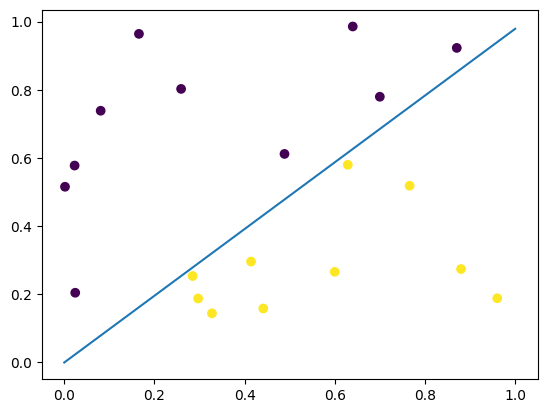

In [81]:
w = pla(X, y)

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot((0, 1), p((0, 1), w))
plt.show()

## 1.3 \[Optional\] Schwertlilien 

* Diese Übung ist optional und wendet sich an diejenigen unter Ihnen, die in dieser Übungseinheit bereits die vorherigen Übungen abgeschlossen haben.

In dieser Übung lernen wir einen klassischen Datensatz kennen, den *Schwertlilien*-Datensatz (englisch: *Iris* dataset). Er wurde in der ersten Hälfte des 19. Jahrhunderts von Edgar Anderson, einem amerikanischen Botaniker, erhoben. Der Datensatz enthält Daten zu Kronblättern (petal) und Kelchblättern (sepal) *dreier Schwertlilienarten* (Iris species). Ein Foto dieser Eigenschaften finden Sie hier:

![Schwertlilien](https://data.bialonski.de/ml/schwertlilien.png)

Weiter unten habe ich Ihnen einen Befehl aus der Python Bibliothek *scikit-learn* aufgeschrieben, mit dessen Hilfe Sie den Iris-Datensatz importieren. Der Iris-Datensatz enthält Eigenschaften (*features*) dreier Schwertlilienarten sowie Informationen, zu welcher Schwertlilienart (*labels*) jeweils ein Satz von *features* gehört. Es handelt sich also um einen Datensatz, 

Lassen sich die drei Schwertlilienarten anhand der erfassten Features unterscheiden? Dies wollen wir uns einmal anschauen.

Wie bei jedem Machine Learning Projekt beginnen wir mit einer Untersuchung des Datensatzes. Untersuchen Sie den Datensatz, der sich im *data* Objekt befindet. Ermitteln Sie mit Code Antworten auf die folgenden Fragen:

**Ihre Aufgaben**

(1) Welche und wie viele Eigenschaften (*features*) enthält der Datensatz?

In [82]:
%matplotlib inline
# Wir importieren zunächst numpy und Teile der Matplotlib. Die werden Sie noch später brauchen.
import numpy as np
from matplotlib import pyplot as plt

# Und hier importieren wir den Schwertlilien-Datensatz.
from sklearn.datasets import load_iris
data = load_iris()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [83]:
X = data['data']
y = data['target']

(2) Wie werden die drei Schwertlilienarten (*labels*) im Datensatz kodiert?

(3) Wie viele Schwertlilien wurden vermessen? (Sie können z.B. die `.shape` Methode nutzen, um die Dimensionen von numpy-arrays zu ermitteln.)

In [84]:
print(X.shape[0])

150


(4) Gewinnen Sie einen ersten Eindruck über die Verteilung der einzelnen Features: 
  * Erzeugen Sie für jedes Feature jeweils ein Histogram über alle Schwertlilien hinweg. (Sie können den `hist` Befehl in der Matplotlib dafür verwenden ([Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html))).
  * Fallen Ihnen Unterschiede zwischen den Histogrammen auf?

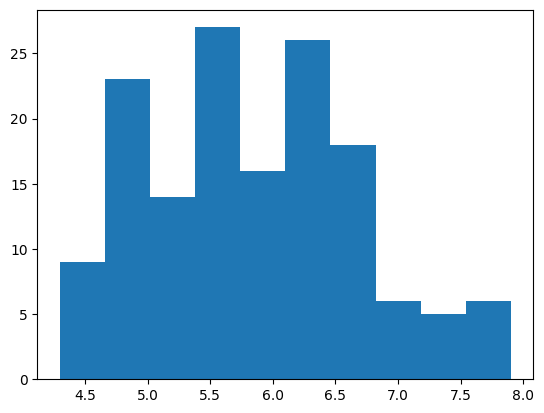

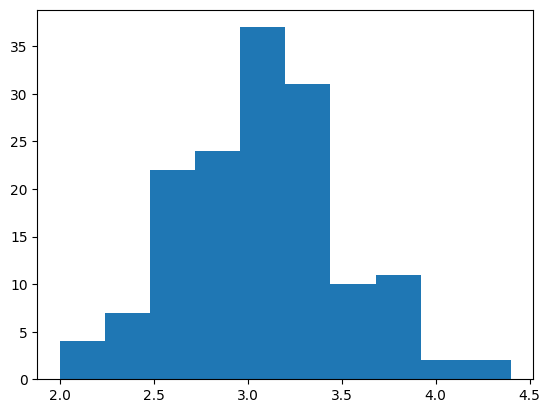

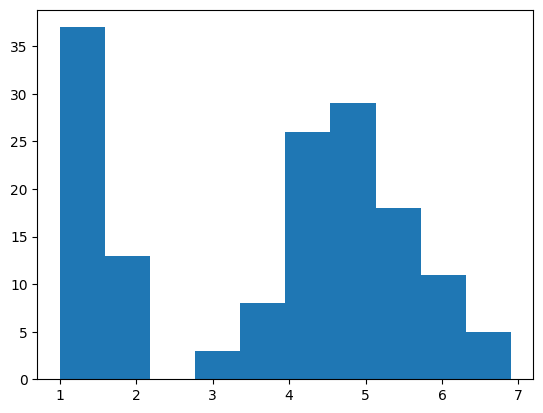

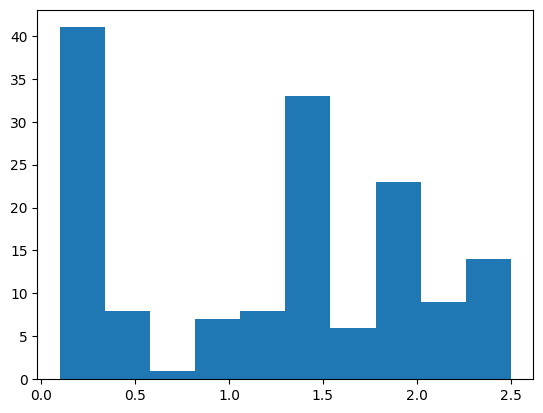

In [85]:
for i in range(X.shape[1]):
    plt.hist(X[:,i])
    plt.show()

(5) Wir haben bisher jedes Feature (Eigenschaft) einzeln betrachtet. Lassen Sie uns nun Paare von unterschiedlichen Features betrachten.
  * Wie viele solcher Featurepaare gibt es?
  * Erzeugen Sie für jedes dieser Featurepaare einen Scatterplot. Nutzen Sie dazu den `scatter` Befehl ([Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)).
  * Falls Sie dies noch nicht gemacht haben: Modifizieren Sie die Scatterplots so, dass die Farben der Punkte die Schwertlilienart kodiert (benutzen Sie dazu die Informationen "target" im Datensatz und verknüpfen diese mit dem `c=` Argument des scatter Befehls ([Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html))).
  * Gibt es in den Scatterplots auffällige Muster? Haben Sie eine Idee, ob und wie sich manche Schwertlilienarten von anderen unterscheiden lassen?

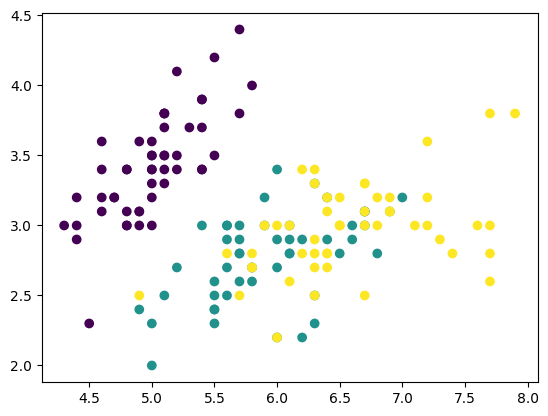

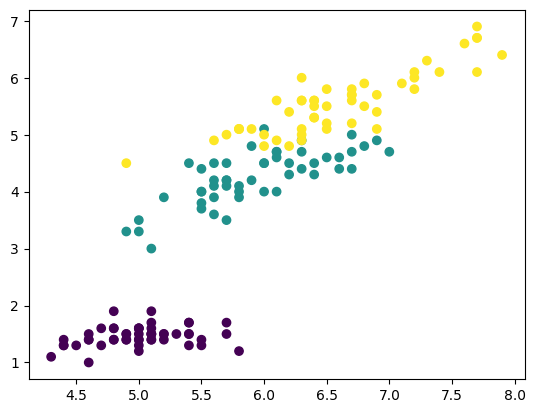

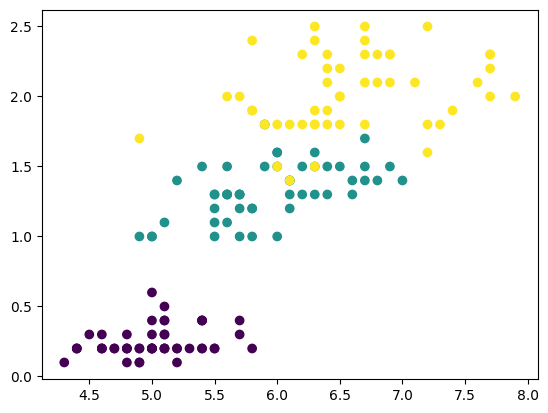

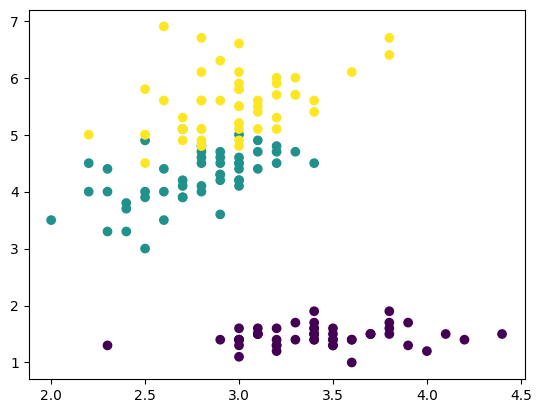

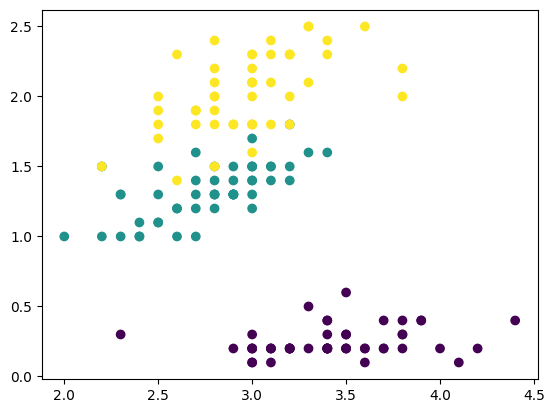

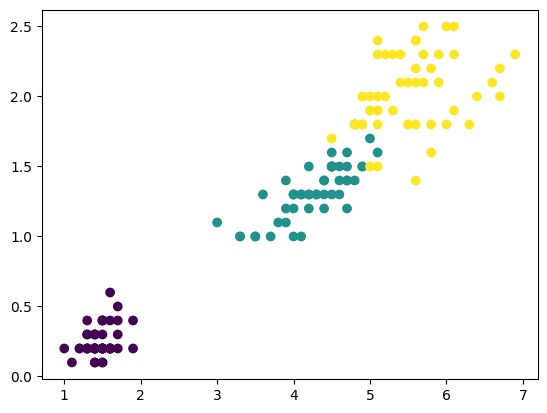

In [86]:
for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.scatter(X[:,i], X[:,j], c=y)
        plt.show()

(6) Wählen Sie ein Featurepaar aus, mit dem Sie eine Schwertlilienart von den anderen beiden Arten mit einer Gerade (Perzeptron) unterscheiden können. Nutzen Sie Ihren Code aus der vorherigen Aufgabe, um auf diesem Featurepaar ein Perzeptron zu trainieren. Visualisieren Sie die Featureebene mitsamt der Daten des Featurepaares, das Sie ausgewählt haben, sowie der gefundenen Gerade des Perzeptrons.

True


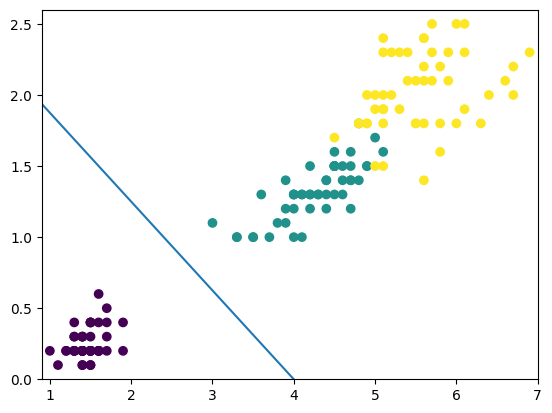

In [87]:
Z = X[:,2:4]

w = pla(Z, (y == 0)*2-1)

xlim = (Z[:,0].min()-0.1, Z[:,0].max()+0.1)
ylim = (Z[:,1].min()-0.1, Z[:,1].max()+0.1)

plt.scatter(Z[:,0], Z[:,1], c=y)
plt.plot(xlim, p(xlim, w))
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

Damit darf ich Ihnen gratulieren. Sie haben das Perzeptron-Lernmodell genutzt, um eine Schwertlilienart von den anderen beiden automatisch anhand ihrer Features zu unterscheiden! :-)